<a href="https://colab.research.google.com/github/Manjuphoenix/COVID19-Chest-X-ray-detection/blob/master/Copy_of_neural_nets_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hello there

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

import torch
import torchvision

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


In [2]:
#train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

!pip install kaggle

from google.colab import files 
files.upload()

#Make a directory named kaggle and copy the kaggle.json file there; and change its permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#imagenet_data = torchvision.datasets.ImageNet('https://kaggle.com/saroz014/plant-diseases')
#data_loader = torch.utils.data.DataLoader(imagenet_data, batch_size=4, shuffle=True, num_workers=args.nThreads)

#choose location of kaggle.json
#C:\Users\micht\.kaggle

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d saroz014/plant-diseases

100% 6.38G/6.39G [00:54<00:00, 118MB/s]
100% 6.39G/6.39G [00:54<00:00, 125MB/s]


In [4]:
from zipfile import ZipFile
file_name = 'plant-diseases.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  #zip.printdir()
  print(zip.extractall())
  #zip.close()
  print('Done')

None
Done


In [5]:
#'dataset_itr2\train\Tomato__Septoria_leaf_spot'
#dataset is in a folder, not a file... so im not sure how to handle this
# print(file)

In [ ]:
# call extract() method to extract any file by specifying its path in the zip file. #e.g.
# zip.extract('python_files/python_wiki.txt')

#If you want to read some specific file, :
# data = zip.read(name_of_file_to_read)

In [6]:
#to unzip data:
! unzip plant-diseases.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139_90degFlipLR.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139_90degFlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139_FlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389_90degFlipLR.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389_90degFlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389_FlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___health

In [7]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential

In [8]:
model = Sequential()
model.add(Convolution2D(filters=64, 
                        kernel_size=(3,3), 
                        activation='relu',
                   input_shape=(64, 64, 3)
                       ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(filters=64,
                        kernel_size=(3,3), 
                        activation='relu',
                       ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                       ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [11]:
import os
from torch import utils
import shutil

!mkdir /content/data_set/TestFolder
!mkdir /content/data_set/TrainFolder

dir_path = '/content/dataset_itr2/dataset_itr2/test'
cl = os.listdir(dir_path)
print(cl)
unique_plants = []
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

#What I wanna do here, is seperate the data based on their unique classes
#Creating Directories in another folder to avoid confusion, so mypath is like the target path:
my_path = '/content/data_set/TestFolder'
for u in unique_plants:
    new_dir = my_path + '/' + u
    if os.path.isdir(new_dir) == False:
        os.mkdir(new_dir)
        print(new_dir + ' -> Directory created')

#moving data into them
new_dirs = os.listdir(my_path)
#Note : cl holds the original directories as segregated by disease
for i in cl:
    x = i.split('_')
    for d in new_dirs:
        if x[0] == d:
            #check if folder already exists  
            target = my_path + '/' + d
            if os.path.isdir(target) == True:
                shutil.move(dir_path + '/' + i, target)

['Peach___Bacterial_spot', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___healthy', 'Soybean___healthy', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___healthy', 'Grape___Black_rot', 'Tomato___healthy', 'Apple___Apple_scab', 'Squash___Powdery_mildew', 'Apple___Black_rot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___healthy', 'Peach___healthy', 'Tomato___Late_blight', 'Pepper,_bell___Bacterial_spot', 'Corn_(maize)___healthy', 'Apple___Cedar_apple_rust', 'Potato___Late_blight', 'Blueberry___healthy', 'Tomato___Bacterial_spot', 'Raspberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Potato___Early_blight', 'Pepper,_bell___healthy', 'Tomato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Potato___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Common_rust_', 'Tomato__

In [12]:
dir_path = '/content/dataset_itr2/dataset_itr2/train'
cl = os.listdir(dir_path)
print(cl)
unique_plants = []
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

#What I wanna do here, is seperate the data based on their unique classes
#Creating Directories in another folder to avoid confusion, so mypath is like the target path:
my_path = '/content/data_set/TrainFolder'
for u in unique_plants:
    new_dir = my_path + '/' + u
    if os.path.isdir(new_dir) == False:
        os.mkdir(new_dir)
        print(new_dir + ' -> Directory created')

#moving data into them
new_dirs = os.listdir(my_path)
#Note : cl holds the original directories as segregated by disease
for i in cl:
    x = i.split('_')
    for d in new_dirs:
        if x[0] == d:
            #check if folder already exists  
            target = my_path + '/' + d
            if os.path.isdir(target) == True:
                shutil.move(dir_path + '/' + i, target)

['Peach___Bacterial_spot', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___healthy', 'Soybean___healthy', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___healthy', 'Grape___Black_rot', 'Tomato___healthy', 'Apple___Apple_scab', 'Squash___Powdery_mildew', 'Apple___Black_rot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___healthy', 'Peach___healthy', 'Tomato___Late_blight', 'Pepper,_bell___Bacterial_spot', 'Corn_(maize)___healthy', 'Apple___Cedar_apple_rust', 'Potato___Late_blight', 'Blueberry___healthy', 'Tomato___Bacterial_spot', 'Raspberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Potato___Early_blight', 'Pepper,_bell___healthy', 'Tomato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Potato___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Common_rust_', 'Tomato__

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from keras_preprocessing.image import ImageDataGenerator
import PIL

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'dataset_itr2/train/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        'test/',
        target_size=(64, 64),
        batch_size=32,
       class_mode='binary')
model.fit(
        training_set,
        steps_per_epoch=8000,
        epochs=2,
        validation_data=test_set,
        )

# New Section

# Pytorch pretrained model testing

In [21]:
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms

import copy
import time
import matplotlib.pyplot as plt

import torchvision
import torch
from torch.autograd import Variable
import torch.nn as nn
import numpy as np
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [17]:
transform =   transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
        transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15, resample=False, fillcolor=0),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1362: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1376: UserWarning: Argument fillcolor is deprecated and will be removed since v0.10.0. Please, use fill instead
  "Argument fillcolor is deprecated and will be removed since v0.10.0. Please, use fill instead"


['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


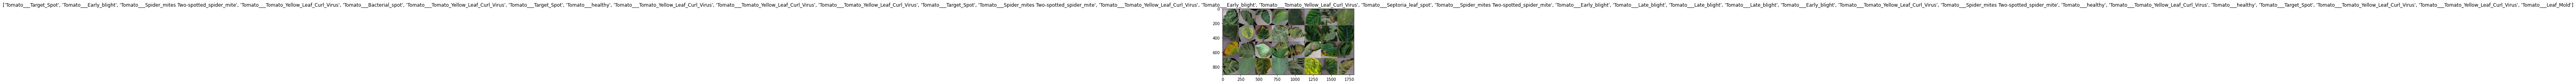

In [22]:
train_set = torchvision.datasets.ImageFolder('TrainFolder/Tomato', transform=transform)
test_set = torchvision.datasets.ImageFolder('TestFolder/Tomato', transform=transform)

print(test_set.classes)
print(train_set.classes)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=True)

import torchvision
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
# Get a batch of training data
inputs, classes = next(iter(train_loader))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out,title=[train_set.classes[x] for x in classes])

In [26]:
import torchvision.models as models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ft = models.vgg16(pretrained=True)

In [ ]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          transform[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")                                                                                                                

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model